# 📝 Introductory exercise for non i.i.d. data

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">i.i.d is the acronym of "independent and identically distributed"
(as in "independent and identically distributed random variables").</p>
</div>

This exercise aims at showing some aspects to consider when dealing with non
i.i.d data, typically time series.

For this purpose, we will create a synthetic dataset simulating stock values.
We will formulate the following data science problem: predict the value of a
specific stock given other stock.

To make this problem interesting, we want to ensure that any predictive model
should **not** work. In this regard, the stocks will be generated completely
randomly without any link between them. We will only add a constraint: the
value of a stock at a given time `t` will depend on the value of the stock
from the past.

We will create a function to generate such data.

In [1]:
import numpy as np
import pandas as pd

def generate_random_stock_market(n_stock=3, seed=0):
    rng = np.random.RandomState(seed)

    date_range = pd.date_range(start="01/01/2010", end="31/12/2020")
    stocks = np.array([
        rng.randint(low=100, high=200) +
        np.cumsum(rng.normal(size=(len(date_range), )))
        for _ in range(n_stock)]).T
    return pd.DataFrame(stocks,
        columns=[f"Stock {i}" for i in range(n_stock)],
        index=date_range)

Now that we have our data generator, let's create three quotes, corresponding
to the quotes of three different companies for instance. We will plot
the stock values

In [2]:
stocks = generate_random_stock_market()
stocks.head()

,Stock 0,Stock 1,Stock 2
2010-01-01,145.122795,121.931662,190.469167
2010-01-02,145.425600,120.771145,190.261145
2010-01-03,145.496459,122.281423,191.566923
2010-01-04,145.569501,122.174231,191.399200
2010-01-05,144.147175,123.107346,189.082024


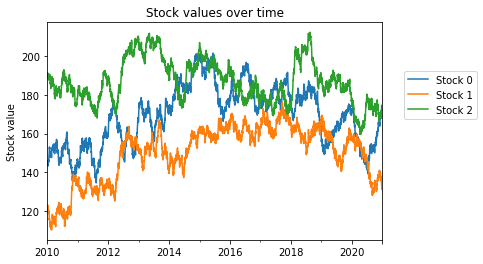

In [3]:
import matplotlib.pyplot as plt

stocks.plot()
plt.ylabel("Stock value")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Stock values over time")

Because the stocks are generated randomly, it is not possible for a
predictive model to be able to predict the value of a stock depending on the
other stocks. By using the cross-validation framework from the previous
exercise, we will check that we get such expected results.

First, let's organise our data into a matrix `data` and a vector `target`.
Split the data such that the `Stock 0` is the stock that we want to predict
and the `Stock 1` and `Stock 2` are stocks used to build our model.

In [4]:
data, target = stocks.drop(columns=['Stock 0']), stocks['Stock 0']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4018 entries, 2010-01-01 to 2020-12-31
Freq: D
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Stock 1  4018 non-null   float64
 1   Stock 2  4018 non-null   float64
dtypes: float64(2)
memory usage: 94.2 KB


We can display an interactive diagram with the following command:

In [5]:
from sklearn import set_config
set_config(display='diagram')

Let's create a machine learning model. We can use a
`GradientBoostingRegressor`.

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

regressor = GradientBoostingClassifier(random_state=0)
regressor

GradientBoostingClassifier(random_state=0)

Now, we have to define a cross-validation strategy to evaluate our model.
Use a `ShuffleSplit` cross-validation.

In [7]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(random_state=0)

We should be set to make our evaluation. Call the function `cross_val_score`
to compute the $R^2$ score for the different split and report the mean
and standard deviation of the model.

In [8]:
from sklearn.model_selection import cross_val_score

test_score = cross_val_score(regressor, data, target, 
    cv=cv, n_jobs=-1)
print(f"The mean R2 is: "
    f"{test_score.mean():.2f} +/- "
    f"{test_score.std():.2f}")

The mean R2 is: nan +/- nan


Your model is not giving random predictions. Could you ellaborate on what
are the reasons of such a success on random data.

We see that our model cannot predict anything because it doesn't have samples around the validation sample. It is really important to not use an out of shelves cross-validation strategy which do not respect some assumptions such as having i.i.d data. It might lead to absurd results which could make think that a predictive model might work.